In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

In [3]:
x = np.linspace(-5, 5, 100)

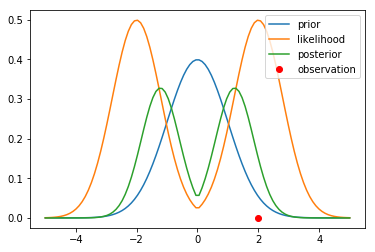

In [4]:
def likelihood(y, Hx, sigma_r):
    return scipy.stats.norm(loc=Hx, scale=sigma_r).pdf(y)

def bayes(prior, lik, dx):
    posterior = prior * lik
    posterior /= (np.sum(posterior)*dx)
    return posterior

In [ ]:
y = 2
sigma_r = 0.8
H = lambda x: abs(x)

prior_pdf = scipy.stats.norm(0, 1).pdf(x)
lik = likelihood(y, H(x), sigma_r)
posterior = bayes(prior_pdf, lik, x[1]-x[0])

plt.plot(x, prior_pdf, label='prior')
plt.plot(x, lik, label='likelihood')
plt.plot(x, posterior, label='posterior')
plt.plot(y, 0, 'ro', label = 'observation')
plt.legend()

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact(y=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1),
        sigma_r=widgets.FloatSlider(value=0.5, min=0.1, max=5, step=0.1) )
def bayes_plots(y, sigma_r):
    
    H = lambda x: x**2
    
    prior_pdf = scipy.stats.norm(0, 1).pdf(x)
    lik = likelihood(y, H(x), sigma_r)
    posterior = bayes(prior_pdf, lik, x[1]-x[0])
    
    plt.ylim(ymax=1.5)
    plt.plot(x, prior_pdf, label='prior')
    plt.plot(x, lik, label='likelihood')
    plt.plot(x, posterior, label='posterior')
    plt.plot(y, 0.015, 'ro', label = 'observation')
    plt.legend()


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHRpb249dSd5JywgbWF4PTQuMCwgbWluPS00LjApLCBGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2PigKY=


In [6]:
@interact(alpha=widgets.FloatSlider(value=0.5, min=0.01, max=1, step=0.01))

def OI_plots(alpha):

    x1 = -2. # posición instrumento A
    x0 = 0. # posición donde queremos estimar
    x2 = np.linspace(-4.,4.,100) # posiciónes posibles para el instrumento B

    d10 = abs(x1-x0) 
    d12 = abs(x1-x2)
    d20 = abs(x2-x0)
    rho10 = (1.+d10) * np.exp(-d10)
    """
       Calculate weights for obs 1 and obs 2
    """
    rho20 = (1+d20) * np.exp(-d20)
    rho12 = (1+d12) * np.exp(-d12)
    w1a = rho10*(1+alpha) - rho12*rho20
    w2a = rho20*(1+alpha) - rho12*rho10
    denom = (1+alpha)**2 - rho12*rho12
    
    w1 = w1a/denom # peso de la "información" del instrumento A
    w2 = w2a/denom # peso de la "información" del instrumento B
    """
       Calculate the analysis error variance
         normalized by the background error variance
    """
    var_a = 1. - ((1+alpha)*(rho10**2+rho20**2)-2*rho10*rho20*rho12)/denom

    plt.ylim(ymax=1., ymin=-0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.plot(x2, var_a, label='analysis variance')
    plt.plot(x2, w1, label='w1')
    plt.plot(x2, w2, label='w2')
    plt.legend()
    


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdhbHBoYScsIG1heD0xLjAsIG1pbj0wLjAxLCBzdGVwPTAuMDEpLCBPdXRwdXQoKSksIF/igKY=


In [7]:
@interact(x2=widgets.FloatSlider(value=1, min=-4, max=4, step=0.1))
def OI_plots(x2):

    alpha = np.linspace(0.01, 1, 100)
    x1 = -2. # posición instrumento A
    x0 = 0. # posición donde queremos estimar
    
    d10 = abs(x1-x0) 
    d12 = abs(x1-x2)
    d20 = abs(x2-x0)
    rho10 = (1.+d10) * np.exp(-d10)
    """
       Calculate weights for obs 1 and obs 2
    """
    rho20 = (1+d20) * np.exp(-d20)
    rho12 = (1+d12) * np.exp(-d12)
    w1a = rho10*(1+alpha) - rho12*rho20
    w2a = rho20*(1+alpha) - rho12*rho10
    denom = (1+alpha)**2 - rho12*rho12
    
    w1 = w1a/denom # peso de la "información" del instrumento A
    w2 = w2a/denom # peso de la "información" del instrumento B
    """
       Calculate the analysis error variance
         normalized by the background error variance
    """
    var_a = 1. - ((1+alpha)*(rho10**2+rho20**2)-2*rho10*rho20*rho12)/denom

    plt.ylim(ymax=1., ymin=-0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.plot(alpha, var_a, label='analysis variance')
    plt.plot(alpha, w1, label='w1')
    plt.plot(alpha, w2, label='w2')
    plt.legend()
    


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSd4MicsIG1heD00LjAsIG1pbj0tNC4wKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHXigKY=
